
# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.  The analysis will be applited to this dataset according to importancy of the data. The main data analysis proccesses that will be used are Data cleaning, Data wrangling and investigating data and giving some conclusion at the end. The analysis include following variables:


    - popularity
    - budget
    - revenue
    - original_title
    - keywords
    - genres
    - vote_count
    - release_year


### Questions:
    
    1. What are th Top 10 most high budget movies
    2. What keywords word is the most popular?
    3. What genres with the highest release?
    4. What are the most voted movies?
    5. Relationship between popularity vs budget ? poularity vs revenue?
    6. What is a Budget and revenue change per year?
    7. How the number of released movies are changed per-year?
    

In [1]:
#import packages for data analysis and plotting eand etc.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Data/tmdb-movies.csv')

# check general info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
# shape of the data 
df.shape

(10866, 21)

In [4]:
# let's see first five rows of the data
df.head(5)

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [22]:
# check lat rows of the data
df.tail(2)

id    imdb_id  popularity  budget  revenue  \
10864  21449  tt0061177    0.064317       0        0   
10865  22293  tt0060666    0.035919   19000        0   

                 original_title  \
10864    What's Up, Tiger Lily?   
10865  Manos: The Hands of Fate   

                                                    cast homepage  \
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...      NaN   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...      NaN   

               director                                       tagline  \
10864       Woody Allen                     WOODY ALLEN STRIKES BACK!   
10865  Harold P. Warren  It's Shocking! It's Beyond Your Imagination!   

          ...                                                overview runtime  \
10864     ...       In comic Woody Allen's film debut, he took the...      80   
10865     ...       A family gets lost on the road and stumbles up...      74   

              genres     production_companies release_date vote_count  \
10864  Action|Comedy  Benedict Pictures Corp.      11/2/66         22   
10865         Horror                Norm-Iris     11/15/66         15   

       vote_average  release_year     budget_adj  revenue_adj  
10864           5.4          1966       0.000000          0.0  
10865           1.5          1966  127642.279154          0.0  

[2 rows x 21 columns]

In [23]:
# Summary statistics for columns
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [24]:
# The number of unique values for each column 
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

## Data cleaning


#### 1. Check for Nan values in the data

In [25]:
# summing up all nan values in the data by using isnull() command and sum()
null_values = df.isnull().sum()
null_values

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

As we can see from the output. Most columns wit Nan values are 'homepage', 'tagline', 'keywords' and
'production companies'. Since the columns are mostly related each othe it is hard to get rid of all nan values
for the whole data, instead we did removed Nan values accordingly. 

#### 2. Check for duplicates

In [26]:
# check for duplicate values in the columns of data
duplicated = df.duplicated().sum()
duplicated

1

> It can be clear that the there is only one duplicated data.

In [27]:
# remove duplicates from the data
df.drop_duplicates(inplace=True)

#### 3.Change the datformat for 'release_date' column to datatime format

In [28]:
# the datformate for release_date columns is in the string format
# it will be changed to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head(3)

0   2015-06-09
1   2015-05-13
2   2015-03-18
Name: release_date, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis



### Research question: 1. Top 10 most high budget movies

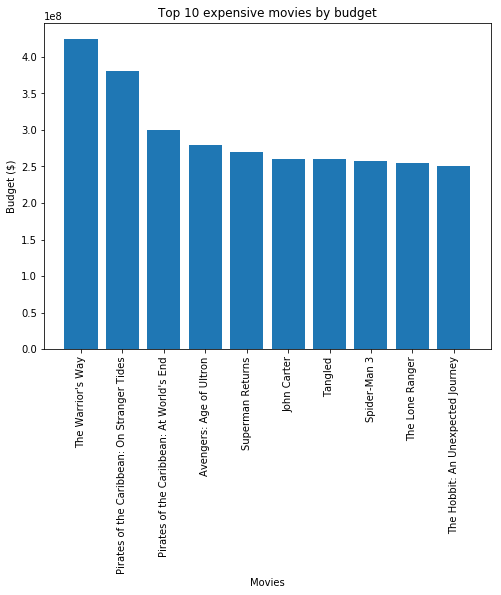

In [5]:
#Top 10 movies by its budget

#to discover this we need movie title and budget columns from the database
top10_movies = df[['budget','original_title']]

#budget values are sorted in ascending order and top 10 movies are selected 
top10 = top10_movies.sort_values('budget', ascending = False)[0:10]
# set the figure size
plt.figure(figsize=(8,6))
#plot as a bar chart
plt.bar(top10['original_title'], top10['budget']);
# setting x and y labels of the chart
plt.ylabel('Budget ($)')
plt.xlabel('Movies')
# rotate the movie names for better to avoid mix of names on the chart
plt.xticks(rotation=90)
plt.title('Top 10 expensive movies by budget')
plt.show()

Short conclusion: Overall the plot shows that the average budget for all movies is avove than 2.5 billion dollar. The highest budet movies was "The Warrior's Way.

### Research Question 2:  What keyword word is the most popular?

In [6]:
# extract the keyword column from the data 
kword = df['keywords']
kword.head(5)

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

>As we can see keywords row include many different words with separated with "|" 
Since our plan is to count each word frequency in search we need to count them one bye one. Thus I created simple function below for counting occurrences for each word 


In [21]:
# the function for the calculation of occurences
def top_occurs(k):
    # first extract occurences
    a = []
    for i in range(len(k)):
        lis = str(k[i]).split('|')
        #print(lis)
        for j in range(len(lis)):
            a.append(lis[j])
    #extract counted unique values
    names, occurrences = np.unique(a, return_counts = True)
    # save to dataframe for conveneince use 
    data  = {'occurrences': occurrences, 'names': names}
    df_keywords = pd.DataFrame(data)

    top10_occurrences = df_keywords.sort_values('occurrences', ascending = False)
    return top10_occurrences

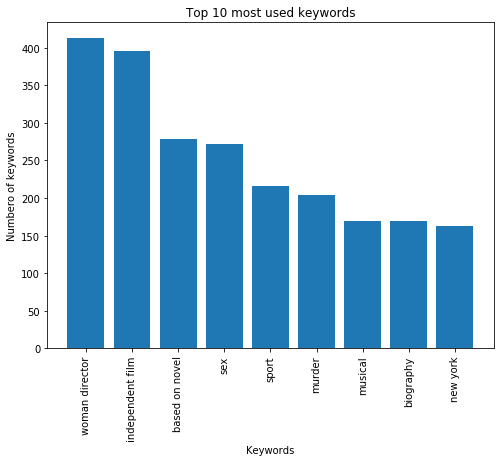

In [11]:
# count each occurences of keywords
# top10 keywords 
top10_kwords = top_occurs(kword)[1:10]

#set the figsize 
plt.figure(figsize=(8,6))
# rotate x axes values 
plt.xticks(rotation=90)
#set the title
plt.title('Top 10 most used keywords')
# x, y labels
plt.ylabel('Numbero of keywords')
plt.xlabel('Keywords')
#plot as a horizontal bar graph
plt.bar(top10_kwords['names'], top10_kwords['occurrences']);
plt.show()

Short conclusion: The most common keyword was 'woman director' with occurance more than 400. Overall, the occurance of the keywords for top 10 keywords was over than 150. 

### Research Question 3:  What genres with the highest release?

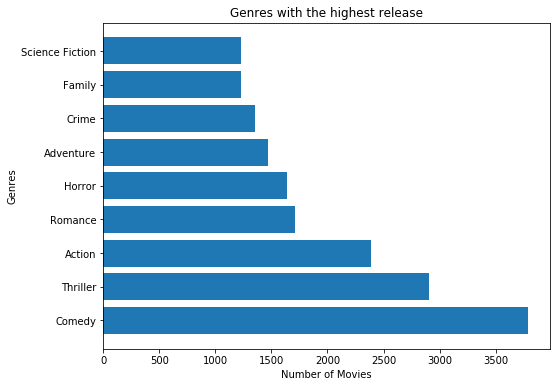

In [12]:
#take genres from the data 
genres = df['genres']

#top10_genres
top10_genres = top_occurs(genres)[1:10]

#set the figsize 
plt.figure(figsize=(8,6))
#plot as a horizontal bar graph
plt.barh(top10_genres['names'], top10_genres['occurrences']);
#set the title
plt.title('Genres with the highest release')
#labels
plt.ylabel('Genres')
plt.xlabel('Number of Movies')
plt.show()

Short conclusion: From the chart it is easy to explore that release of 'drama' movies are dominated over the other genres such as 'crime', 'adventure', 'family' by almost two time more releases. Second hihgest released genre was 'comedy', almost 4000 releases. 

### Research Question 4: What are the most voted movies?

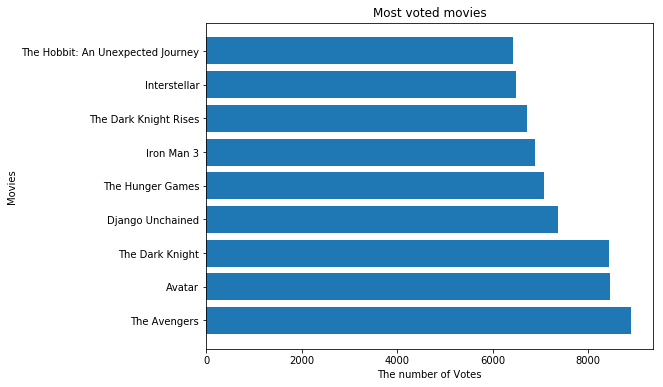

In [13]:
#the title of movies and votes for movies are extracted to new file 
votes = df[['original_title', 'vote_count']]

#sort top10 votes by the title of movie 
top10_votes = votes.sort_values('vote_count', ascending = False)[1:10]

#plotting top 10 movies with the number of votes
#define the figsize
plt.figure(figsize = (8, 6))
#define the title oof the chart
plt.title('Most voted movies')
#labels
plt.xlabel('The number of Votes')
plt.ylabel('Movies')
#plot as a horizontal bar graph
plt.barh(top10_votes['original_title'], top10_votes['vote_count'])
plt.show()


Short conclusion: The figure shows that people mostly voted for 'The Avengers', 'Avater' and 'The Dark Knight', with the number of release higher than 8000 votes. Overall, the votes for movies was higher than averagely 6000 votes for top 10 movies.

### Research Question 5: Relationship between popularity vs budget ? poularity vs revenue?

#### 5.1 Popularity vs Budget

The correlation between popularity and budget is 0.5454722315501995


/home/e/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


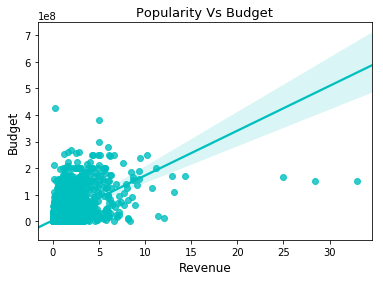

In [14]:
# extract budget and popularity 
pop_budget = df[['budget', 'popularity']]

# calculation of the correlation between budget and populariyt
pop_budget_corr = pop_budget.corr(method = 'pearson')
corr = pop_budget_corr.loc['budget', 'popularity']

print('The correlation between popularity and budget is {}'.format(corr))

# plot the popularit vs budget 
ax = sns.regplot(x=pop_budget['popularity'], y=pop_budget['budget'],color='c')
#set the title and labels of the figure
ax.set_title("Popularity Vs Budget",fontsize=13)
ax.set_xlabel("Revenue",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)
#set the figure size
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#### 5.3 Popularity vs Revenue

Short conclusion: From correlation analysis it easy to assume that popularity and budget are not correlated strongly by showing averge amount, almost 54%. Overall, we can conclude that popular movies does not need to be funded heavily, which means lower budget movies can also achieve higher popularity.

#### 5.3 Popularity vs Revenue

Correlation Between Popularity And Revenue :  0.6633583664517129


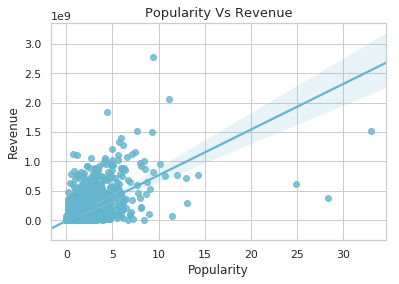

In [15]:
#how does profit change according to their budget.
#make a scatter plot using 'regplot' between 'popularity' and 'revenue'.
ax = sns.regplot(x=df['popularity'], y=df['revenue'],color='c')

#setup the title and the labels of the plot.
ax.set_title("Popularity Vs Revenue",fontsize=13)
#ax.set_xlabel("Profit",fontsize=12)
ax.set_ylabel("Revenue",fontsize=12)
ax.set_xlabel("Popularity", fontsize=12)

#setup the figure size and style sheet of the plot.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

data_corr = df.corr()
#print the correction between them,which was stored in 'data_corr'.
print("Correlation Between Popularity And Revenue : ",data_corr.loc['popularity','revenue'])

Short conclusion: Our coorelation analysis among popularity and revenue show positive value, that is 66%. Thus we can assume the more popular more revenue.

Correlation Between Budget And Revenue :  0.7349006819075996


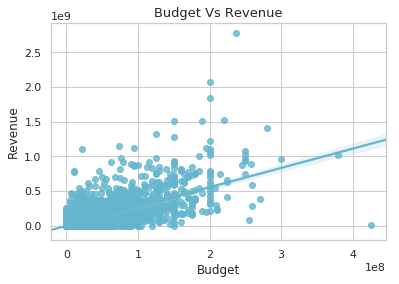

In [16]:
#how does popularity change according to their budget.
#make a scatter plot using 'regplot' between 'popularity' and 'budget'.
ax = sns.regplot(x=df['budget'], y=df['revenue'],color='c')

#setup the title and the labels of the plot.
ax.set_title("Budget Vs Revenue",fontsize=13)
ax.set_ylabel("Revenue",fontsize=12)
ax.set_xlabel("Budget", fontsize=12)
#setup the figure size and style sheet of the plot.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

data_corr = df.corr()
#print the correction between them,which was stored in 'data_corr'.
print("Correlation Between Budget And Revenue : ",data_corr.loc['budget','revenue'])

Short conclusion: The correlation value between budget and revenue was around 73%. which means there is strong relationship between these two variables. This resul can be considered when the deeper analysis are applied to get higher profit.

### Research Question 6: What is a Budget and revenue change per year?

#### 1. Budget change per year

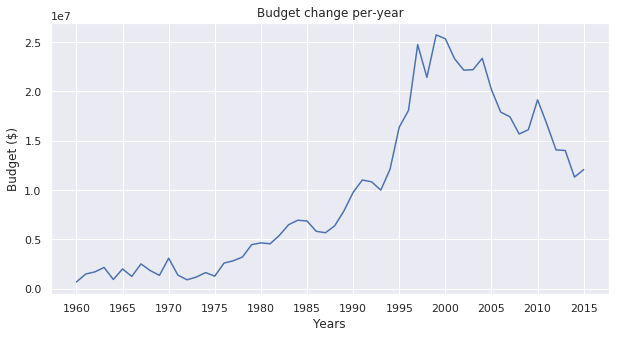

In [17]:
# calculate the budget 
budget_year = df.groupby('release_year')['budget'].mean()

sns.set(rc={'figure.figsize':(10,5)})

plt.xticks(np.arange(1960, 2016, 5))

plt.title('Budget change per-year')
plt.ylabel('Budget ($)')
plt.xlabel('Years')
plt.plot(budget_year);

sns.set_style("whitegrid")


Short conclusion: The line graph shows that the budget between 1995 and 2000 years experienced dramatic increase over the 2.5 billion dollar. After 20th budget start to falling down with high decrease, in 2015, the budget amount was below than 1.5 billion. 

#### 2. Revenue change per year

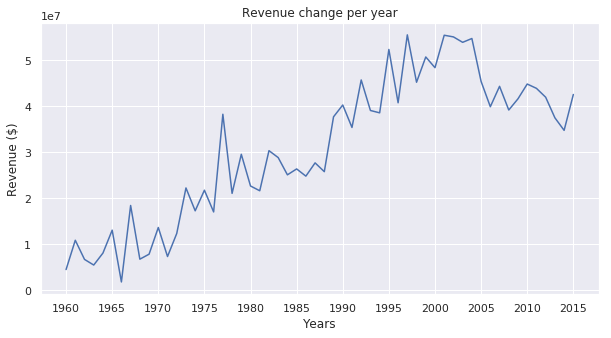

In [18]:
budget_year = df.groupby('release_year')['revenue'].mean()

sns.set(rc={'figure.figsize':(10,5)})

plt.xticks(np.arange(1960, 2016, 5))
plt.title('Revenue change per year')
plt.ylabel('Revenue ($)')
plt.xlabel('Years')

plt.plot(budget_year);

Short conclusion: It is clear that the revenue is increased per-year with little fluctutation. It is needed to be mentioned that the revenue for 2000 was the highest with the hihger than five billion dollar, in ocompared to 2015 which was around four billion

### Research Question 7: How the number of released movies are changed per-year?

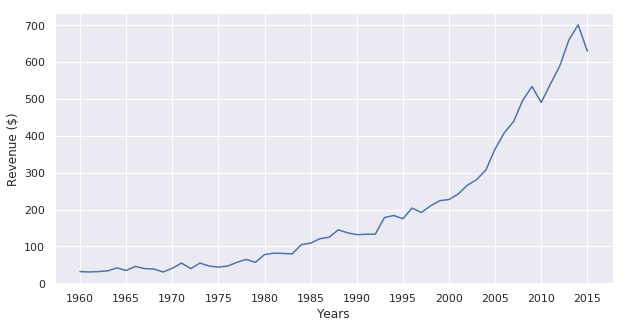

In [19]:
data = df.groupby('release_year').count()['id']

sns.set(rc={'figure.figsize':(10,5)})

plt.xticks(np.arange(1960, 2016, 5))

plt.ylabel('Revenue ($)')
plt.xlabel('Years')

plt.plot(data);

Short conclusion: From the graph it is obvious to see that number of released movies per year are increased rapidly after 20th, while it was performing slow pace increase fomr 1960 to 2000. Overall, the trends for releases of movies are increasing. 

<a id='conclusions'></a>
## Conclusions

> **Results:**
1. Most searched keyword was "Woman director".
2. Drame, Comedy, Thriller and Action are four most-made genres. 
3. Top 3 most voted movies: "The Avengers", "Avatar" and "The Dark Knight"
4. There is positive corellation between Popularity and Budget almost 0.66%
5. The relationship between Budget and Revenue is very strong.
6. The budget for movies are decreased after 20'th
7. The revenue from movies are start to decrease after 20th with fluctuations each year
8. The number of released movies per-year is performed dramatic increase between 2005 and 2015
9. Movies with higher budgets have shown a corresponding increase in the revenues.

> **Limitations:**
1. The dataset columns include many null values which makes the analysis much harder, when other variables are related to these columns. 
2. Some columns contain many values that are separated with "|" such as genres, cast. Which increase the time to process.
3. There is not any informaion in the dataset about currency information. For example, in the analysis of revenue, and budget, there is not currency information is given. Thus I assumed it as a dollar to make more understandable.
 
   